In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
directory = r"D:\Stack Overflow Project\stack-overflow-developer-survey-2024"
df = pd.read_csv(directory + r"\survey_results_public.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0


In [4]:
info = df.info()
print(info)
size = df.shape
print(f"Size of the data frame is: {size}")

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23435 non-null  object 
 1   EdLevel       23435 non-null  object 
 2   YearsCodePro  23345 non-null  object 
 3   Employment    23435 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB
None
Size of the data frame is: (23435, 5)


In [5]:
df = df.dropna()
print(df.isnull().sum())

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64


In [6]:
# Keeping datapoint where user is emloyed full-time:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 17527 entries, 374 to 41185
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       17527 non-null  object 
 1   EdLevel       17527 non-null  object 
 2   YearsCodePro  17527 non-null  object 
 3   Salary        17527 non-null  float64
dtypes: float64(1), object(3)
memory usage: 684.6+ KB
None


In [7]:
print(df.columns)

Index(['Country', 'EdLevel', 'YearsCodePro', 'Salary'], dtype='object')


In [8]:
print(df["Country"].value_counts())

Country
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
                                                        ... 
Botswana                                                   1
Barbados                                                   1
Senegal                                                    1
Suriname                                                   1
Mali                                                       1
Name: count, Length: 155, dtype: int64


In [9]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,91295.0
392,United Kingdom of Great Britain and Northern I...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",18,161044.0
395,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25,121018.0
398,United States of America,Some college/university study without earning ...,30,195000.0


In [10]:
df = pd.DataFrame(df)
country_counts = df["Country"].value_counts()
print(country_counts)

Country
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
                                                        ... 
Botswana                                                   1
Barbados                                                   1
Senegal                                                    1
Suriname                                                   1
Mali                                                       1
Name: count, Length: 155, dtype: int64


In [11]:
# Getting rid of all Countries with less than 400 users:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Other"
    return categorical_map

In [12]:
country_map = shorten_categories(country_counts, 400)
df["Country"] = df["Country"].map(country_map)
df["Country"].value_counts()

Country
Other                                                   5628
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
France                                                   719
Canada                                                   684
Brazil                                                   457
Spain                                                    431
Italy                                                    414
Netherlands                                              406
Australia                                                400
Name: count, dtype: int64

In [13]:
# Inspect Salary range by Visualization:
df["Salary"] = df["Salary"].astype(int)
df["Salary"].describe()

count    1.752700e+04
mean     8.897684e+04
std      1.312431e+05
min      1.000000e+00
25%      3.866600e+04
50%      6.981400e+04
75%      1.118920e+05
max      9.000000e+06
Name: Salary, dtype: float64

In [14]:
def clean_country_names(df):
    # Replacing the long country names with shorter ones
    df['Country'] = df['Country'].replace({
        'United States of America': 'USA', 
        'United Kingdom of Great Britain and Northern Ireland': 'UK'
    })
    return df

df = clean_country_names(df)

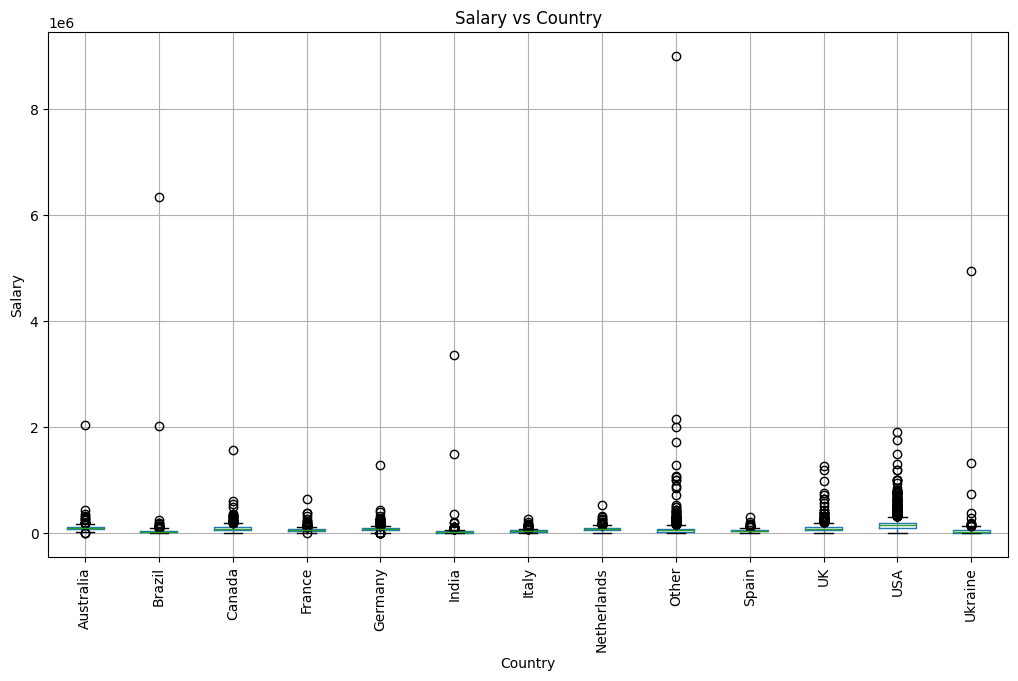

In [15]:
def plot_boxplot(df, column, by, rot=0):
    """
    Function to plot the Salary distribution using Boxplot.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column to plot.
    by (str): The column to group by.
    rot (int): Rotation angle for x-axis labels.
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 7))
    df.boxplot(column, by, ax=ax)
    plt.suptitle("")
    plt.title(f"{column} vs {by}")
    plt.ylabel(column)
    plt.xticks(rotation=rot)
    plt.show()

plot_boxplot(df, "Salary", "Country", 90)

In [16]:
print(f"The shape of the data frame is: {df.shape}")
print(df["Country"].value_counts())

The shape of the data frame is: (17527, 4)
Country
Other          5628
USA            3903
Germany        1491
UK             1141
Ukraine        1017
India           836
France          719
Canada          684
Brazil          457
Spain           431
Italy           414
Netherlands     406
Australia       400
Name: count, dtype: int64


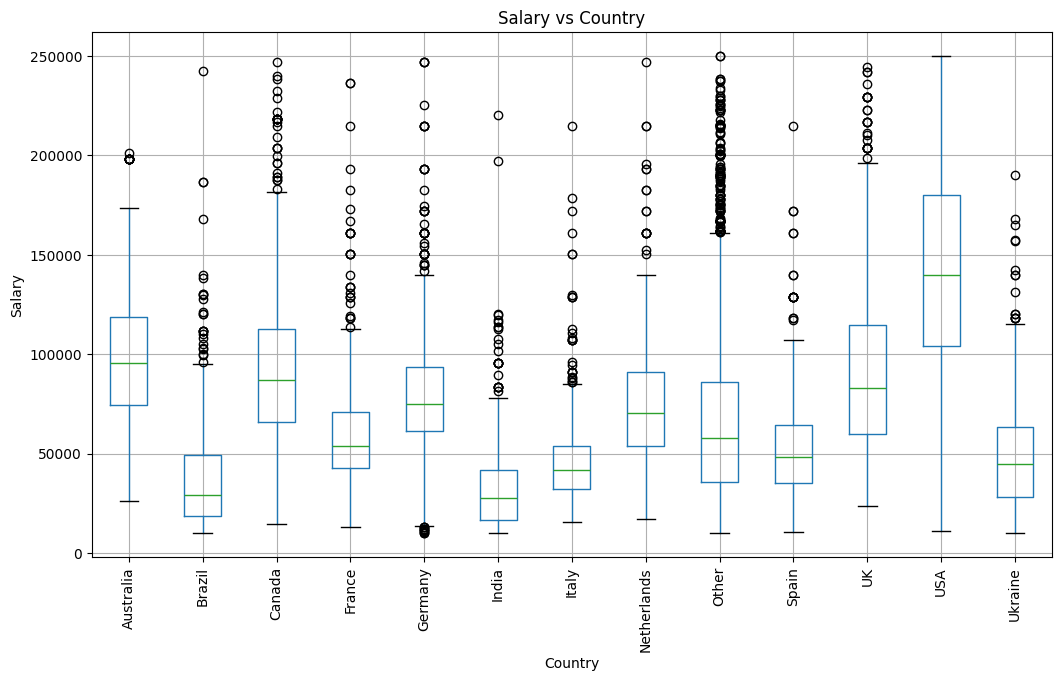

The size of the data frame is now: (15536, 4)


In [17]:
# Filter the DataFrame to keep only rows where the salary is between 10,000 and 250,000
df = df[(df['Salary'] >= 10000) & (df['Salary'] <= 250000)]
plot_boxplot(df, "Salary", "Country", 90)
print (f"The size of the data frame is now: {df.shape}") 

In [18]:
# Exploring the years of Experience of the users, (YearsCodePro):
df["YearsCodePro"].unique()

array(['6', '18', '25', '30', '20', '50', '27', '1', '15', '11', '23',
       '17', '10', '8', '12', '26', '9', '40', '4', '14', '7', '22', '28',
       '44', '13', '16', '3', '35', '5', '31', '41', '36',
       'Less than 1 year', '24', '2', '38', '32', '21', '19', '34', '29',
       '43', '33', '45', '37', '42', '39', '46', '49', '48', '47'],
      dtype=object)

In [19]:
# Function to convert the YearsCodePro column to numeric:
def clean_experience(x):
    if x == "Less than 1 year":
        return 0.5
    if x == "More than 50 years":
        return 51
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience) #Applying the function above
print(f"The resulting unique values in the YearsCodePro column are: {df['YearsCodePro'].unique()}")


The resulting unique values in the YearsCodePro column are: [ 6.  18.  25.  30.  20.  50.  27.   1.  15.  11.  23.  17.  10.   8.
 12.  26.   9.  40.   4.  14.   7.  22.  28.  44.  13.  16.   3.  35.
  5.  31.  41.  36.   0.5 24.   2.  38.  32.  21.  19.  34.  29.  43.
 33.  45.  37.  42.  39.  46.  49.  48.  47. ]


In [20]:
# Exploring the Education level of the users:
df["EdLevel"].unique()

array(['Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [21]:
# Function to clean the Education Level column:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    if "Master’s degree" in x:
        return "Master’s degree"
    if "Professional degree" in x or "Other doctoral" in x:
        return "Post grad"
    return "Less than a Bachelor’s degree"

df["EdLevel"] = df["EdLevel"].apply(clean_education) # Applying the function above
print(f"The resulting unique values in the EdLevel column are: {df['EdLevel'].unique()}")

The resulting unique values in the EdLevel column are: ['Post grad' 'Master’s degree' 'Less than a Bachelor’s degree'
 'Bachelor’s degree']


In [22]:
# Encoding the categorical columns:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ["Country", "EdLevel"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

country_encoded= df["Country"].unique() 
print(f"The encoded values for the Country column are: {country_encoded}")
edlevel_encoded = df["EdLevel"].unique()
print(f"The encoded values for the EdLevel column are: {edlevel_encoded}")
df.head()

The encoded values for the Country column are: [ 8 10 11  3  4  1  2  6  5 12  9  7  0]
The encoded values for the EdLevel column are: [3 2 1 0]


,Country,EdLevel,YearsCodePro,Salary
374,8,3,6.0,30074
379,8,2,6.0,91295
392,10,3,18.0,161044
395,10,2,25.0,121018
398,11,1,30.0,195000


In [23]:
# Create a table that shows what the country and education level values represent:
country_map = {index: label for index, label in enumerate(label_encoders["Country"].classes_)}
edlevel_map = {index: label for index, label in enumerate(label_encoders["EdLevel"].classes_)}
print(f"The mapping of the encoded values for the Country column is: {country_map}")
print(f"The mapping of the encoded values for the EdLevel column is: {edlevel_map}")

The mapping of the encoded values for the Country column is: {0: 'Australia', 1: 'Brazil', 2: 'Canada', 3: 'France', 4: 'Germany', 5: 'India', 6: 'Italy', 7: 'Netherlands', 8: 'Other', 9: 'Spain', 10: 'UK', 11: 'USA', 12: 'Ukraine'}
The mapping of the encoded values for the EdLevel column is: {0: 'Bachelor’s degree', 1: 'Less than a Bachelor’s degree', 2: 'Master’s degree', 3: 'Post grad'}


In [24]:
# Correlation Matrix:
correlation_matrix = df.corr()
print(correlation_matrix)
correlation_matrix["Salary"].sort_values(ascending=False)

               Country   EdLevel  YearsCodePro    Salary
Country       1.000000 -0.068215      0.033481  0.302865
EdLevel      -0.068215  1.000000      0.055380 -0.032920
YearsCodePro  0.033481  0.055380      1.000000  0.363307
Salary        0.302865 -0.032920      0.363307  1.000000


Salary          1.000000
YearsCodePro    0.363307
Country         0.302865
EdLevel        -0.032920
Name: Salary, dtype: float64

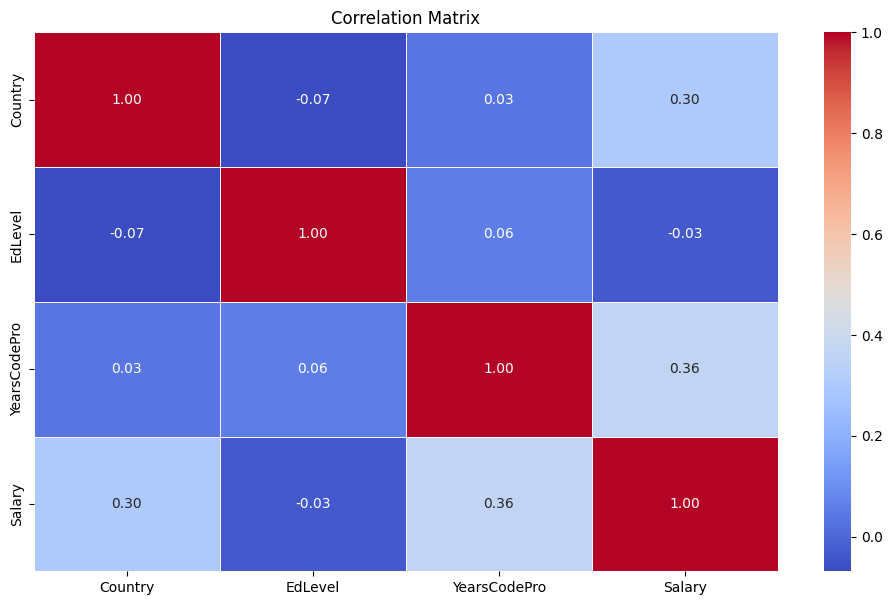

In [25]:
# Plotting the Correlation Matrix using Heatmap and heatmap:
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


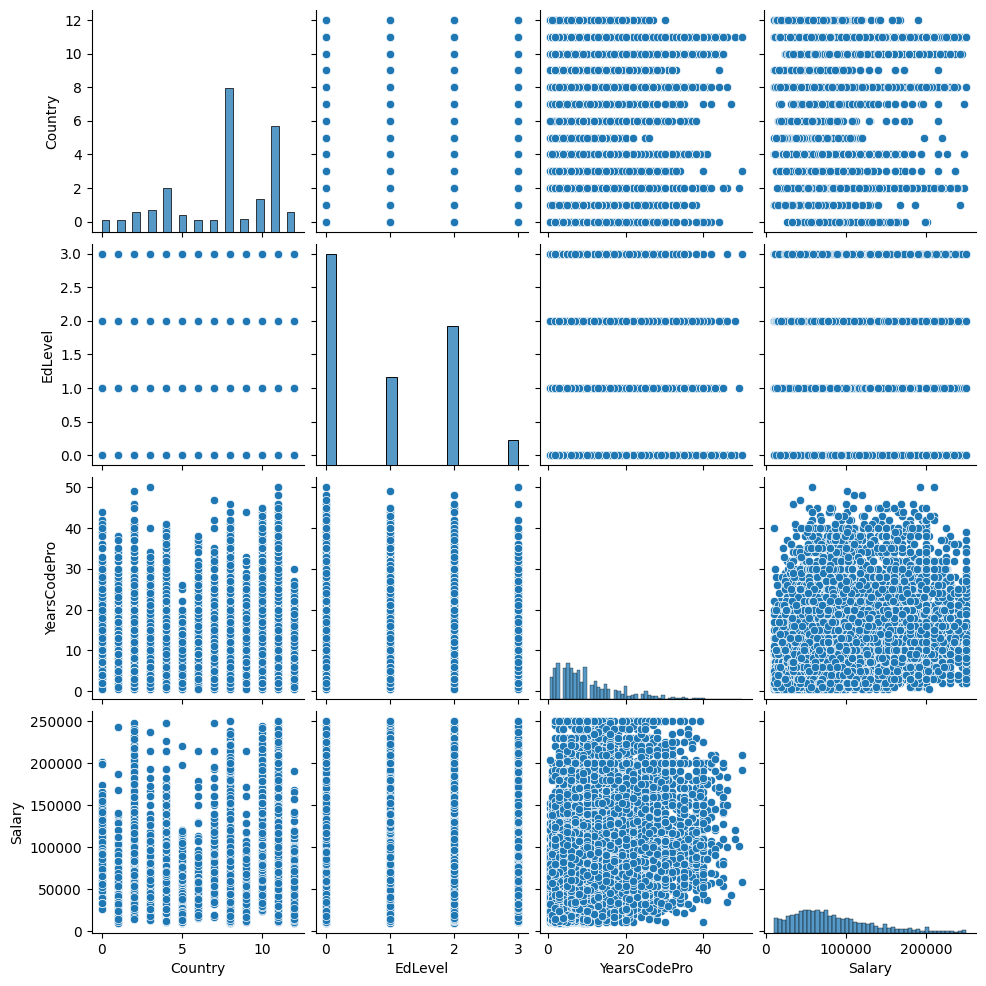

In [26]:
#Pairplot of the data:
sns.pairplot(df)
plt.show()

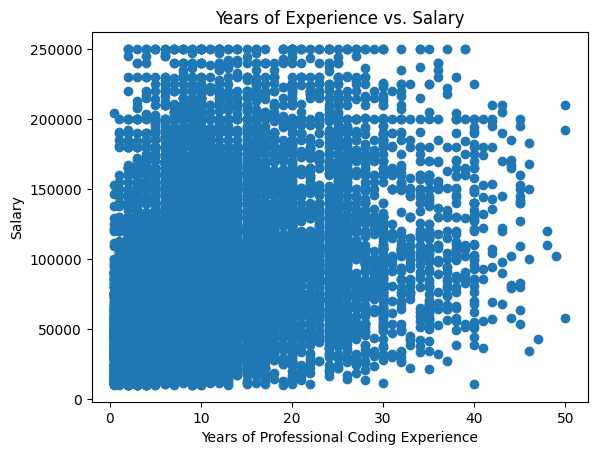

In [27]:
# Scatter plot of Years of Experience vs. Salary
plt.scatter(df['YearsCodePro'], df['Salary'])
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs. Salary')
plt.show()

In [28]:
# Mapping the encoded values to the original values:
df["Country"] = df["Country"].map(country_map)
df["EdLevel"] = df["EdLevel"].map(edlevel_map)
df.head()

,Country,EdLevel,YearsCodePro,Salary
374,Other,Post grad,6.0,30074
379,Other,Master’s degree,6.0,91295
392,UK,Post grad,18.0,161044
395,UK,Master’s degree,25.0,121018
398,USA,Less than a Bachelor’s degree,30.0,195000


In [29]:
# Split the data into features and target variable:
X = df.drop("Salary", axis=1) # Features (Country, EdLevel, YearsCodePro)
y = df["Salary"] # Target variable (Salary)

In [30]:
# KNN Regressor Model:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


In [31]:
# Split the data into training, cross-validation and test sets:
X_train_, X_, y_train_, y_ = train_test_split(X, y, test_size=0.4, random_state=42) # 60% training data, 40% remaining data
X_cv_, X_test_, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42) # 20% cross-validation data, 20% test data (50:50 split)
# Delete the temporary variables:
del X_, y_


print(f"Training set size: {X_train_.shape[0]} samples")
print(f"Cross-validation set size: {X_cv_.shape[0]} samples")
print(f"Test set size: {X_test_.shape[0]} samples")
X_train_.head()

Training set size: 9321 samples
Cross-validation set size: 3107 samples
Test set size: 3108 samples


,Country,EdLevel,YearsCodePro
4129,UK,Bachelor’s degree,6.0
13206,Other,Master’s degree,8.0
27705,Other,Master’s degree,24.0
30969,Netherlands,Post grad,28.0
21426,USA,Less than a Bachelor’s degree,10.0


In [32]:
print(f"Features info:")
print(X_train_.info()) # Display the features info
print(f"Target variable info:")
print(y_train_.info()) # Display the target variable info


Features info:
<class 'pandas.core.frame.DataFrame'>
Index: 9321 entries, 4129 to 19284
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       9321 non-null   object 
 1   EdLevel       9321 non-null   object 
 2   YearsCodePro  9321 non-null   float64
dtypes: float64(1), object(2)
memory usage: 291.3+ KB
None
Target variable info:
<class 'pandas.core.series.Series'>
Index: 9321 entries, 4129 to 19284
Series name: Salary
Non-Null Count  Dtype
--------------  -----
9321 non-null   int64
dtypes: int64(1)
memory usage: 145.6 KB
None


In [33]:
# Encode the categorical columns using get_dummies:
X_train = pd.get_dummies(X_train_, columns=["Country", "EdLevel"], drop_first=True, prefix='', prefix_sep='')
X_cv = pd.get_dummies(X_cv_, columns=["Country", "EdLevel"], drop_first=True, prefix='', prefix_sep='')
X_test = pd.get_dummies(X_test_, columns=["Country", "EdLevel"], drop_first=True, prefix='', prefix_sep='')
# X_train = pd.concat([X_train, X_train_['YearsCodePro']]) # Combine the training features with the YearsCodePro column

# Remove missing values from the training set:
X_train = X_train.dropna()
y_train = y_train_.loc[X_train.index] # Update the target variable to match the training set
# Print the X_train head as a complete table in text format
print("X_train DataFrame (first 5 rows):")

X_train.head()

X_train DataFrame (first 5 rows):


,YearsCodePro,Brazil,Canada,France,Germany,India,Italy,Netherlands,Other,Spain,UK,USA,Ukraine,Less than a Bachelor’s degree,Master’s degree,Post grad
4129,6.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
13206,8.0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
27705,24.0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
30969,28.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
21426,10.0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [34]:
# X_cv = pd.concat([X_cv, X_cv_['YearsCodePro']]) # Combine the cv features with the YearsCodePro column
# Remove missing values from the training set:
X_cv = X_cv.dropna()
y_cv = y_cv.loc[X_cv.index] # Update the target variable to match the training set
# Print the X_cvhead as a complete table in text format
print("X_cv DataFrame (first 5 rows):")
X_cv.head()

X_cv DataFrame (first 5 rows):


,YearsCodePro,Brazil,Canada,France,Germany,India,Italy,Netherlands,Other,Spain,UK,USA,Ukraine,Less than a Bachelor’s degree,Master’s degree,Post grad
15359,36.0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
9542,2.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
12479,9.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
13357,4.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
34615,5.0,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False


In [35]:
# For the test set:
# X_test = pd.concat([X_test, X_test_['YearsCodePro']]) # Combine the test features with the YearsCodePro column
# Remove missing values from the test set:
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index] # Update the target variable to match the test set
# Print the X_test head as a complete table in text format
print("X_test DataFrame (first 5 rows):")
X_test.head()

X_test DataFrame (first 5 rows):


,YearsCodePro,Brazil,Canada,France,Germany,India,Italy,Netherlands,Other,Spain,UK,USA,Ukraine,Less than a Bachelor’s degree,Master’s degree,Post grad
2611,12.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
21238,34.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
28061,10.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
31471,16.0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
19096,43.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


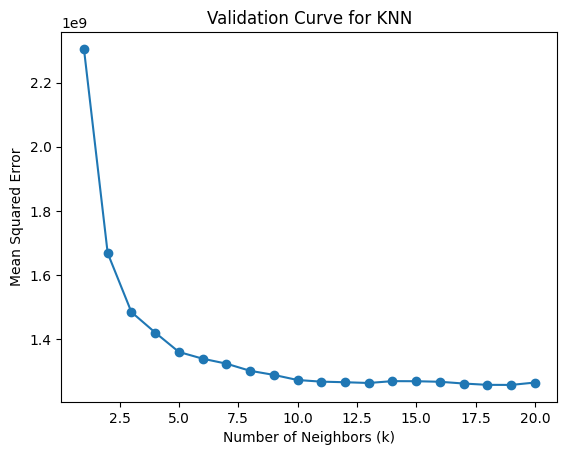

In [36]:
# Define a range of n_neighbors values
neighbors_range = range(1, 21)
mse_scores = []

# Iterate over the range of n_neighbors values
for k in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train_)
    y_pred = knn.predict(X_cv)
    mse = mean_squared_error(y_cv, y_pred)
    mse_scores.append(mse)

# Plot the validation curve
plt.plot(neighbors_range, mse_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve for KNN')
plt.show()

In [37]:
# Train the KNN model
model = KNeighborsRegressor(n_neighbors=12)
model.fit(X_train, y_train_)

# Predict the salary for the cross-validation data
y_pred = model.predict(X_cv)
y_pred = np.round(y_pred, 2)

# Evaluate the model
mse = np.sqrt(mean_squared_error(y_cv, y_pred))
print(f'Mean Squared Error: {mse:.2f}')

# Print the predictions
#print("Predicted salaries for the cross-validation data:")
#print(y_pred)

Mean Squared Error: 35568.67


In [38]:
# Merge the predictions with the actual salaries in the cross-validation data:
predicted_salaries = pd.DataFrame({"Predicted Salary": y_pred, "Actual Salary": y_cv})
predicted_salaries.head()

,Predicted Salary,Actual Salary
15359,104406.00,129602
9542,130333.33,95000
12479,66876.83,64000
13357,113166.67,80000
34615,63964.75,103889


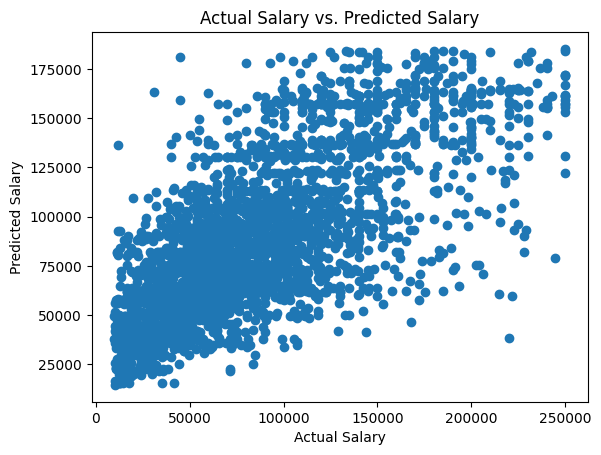

In [39]:
plt.scatter(y_cv, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')  
plt.title('Actual Salary vs. Predicted Salary') 
plt.show()  

In [40]:
# Mean absolute Percentage Error:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(y_cv, y_pred)
print(f'Mean Absolute Percentage Error: {MAPE:.2f}%')

Mean Absolute Percentage Error: 46.98%


In [41]:
# Predict the salary for the test data
y_pred_test = model.predict(X_test)
y_pred_test = np.round(y_pred_test, 2)
#print(f"predicted salaries for the test data:{pd.DataFrame(y_pred_test)}")

# Merge the predictions with the actual salaries in the test data:
predicted_salaries_test = pd.DataFrame({"Predicted Salary": y_pred_test, "Actual Salary": y_test})
print(predicted_salaries_test.head())


       Predicted Salary  Actual Salary
2611           35736.33          29909
21238         150833.33         180000
28061         141375.00         175000
31471          89505.17         171850
19096         141862.50         145000


In [42]:
MAPE_test = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'Mean Absolute Percentage Error for the test data: {MAPE_test:.2f}%')

Mean Absolute Percentage Error for the test data: 45.80%


In [43]:
# Mse for the test data:
mse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Mean Squared Error for the test data: {mse_test:.2f}')

Mean Squared Error for the test data: 35888.38


In [44]:
# Using Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [45]:
RANDOM_STATE = 42
min_samples_split_list = [50, 100, 200, 300, 400]
max_depth_list = [2, 4, 8, 16, 32, 64]
n_estimators_list = [10, 50, 100, 300]

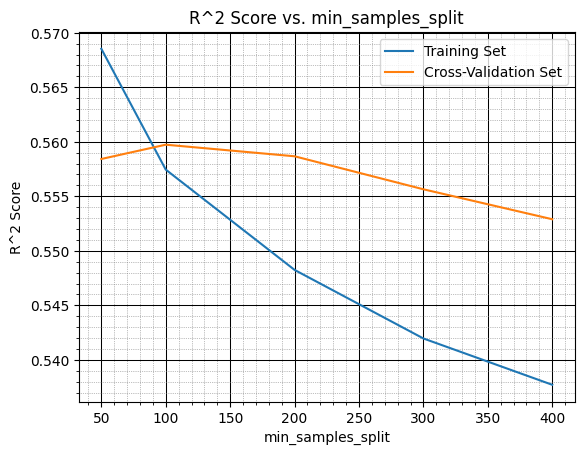

In [46]:
# Determine Number of Split Samples:
accuracy_list_train = []
accuracy_list_cv = []
for min_samples_split in min_samples_split_list:
    model_2 = RandomForestRegressor(min_samples_split=min_samples_split, random_state=RANDOM_STATE)
    model_2.fit(X_train, y_train_)
    y_pred_train = model_2.predict(X_train)
    y_pred_cv = model_2.predict(X_cv)
    accuracy_train = r2_score(y_train_, y_pred_train)
    accuracy_cv = r2_score(y_cv, y_pred_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

# Plot the accuracy vs. min_samples_split
plt.plot(min_samples_split_list, accuracy_list_train, label='Training Set')
plt.plot(min_samples_split_list, accuracy_list_cv, label='Cross-Validation Set')
plt.xlabel('min_samples_split')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. min_samples_split')
plt.legend()
# Enable grid lines
# Enable major grid lines
plt.grid(True, which='major', linestyle='-', linewidth=0.75, color='black')

# Enable minor ticks and grid lines
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray')
plt.show()

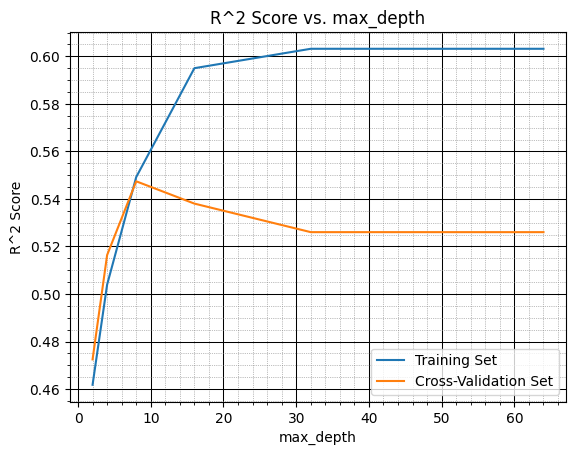

In [47]:
# Determine te maximum depth:
accuracy_list_train = []
accuracy_list_cv = []
for max_depth in max_depth_list:
    model_3 = RandomForestRegressor(max_depth=max_depth, random_state=RANDOM_STATE)
    model_3.fit(X_train, y_train_)
    y_pred_train = model_3.predict(X_train)
    y_pred_cv = model_3.predict(X_cv)
    accuracy_train = r2_score(y_train_, y_pred_train)
    accuracy_cv = r2_score(y_cv, y_pred_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

# Plot the accuracy vs. max_depth
plt.plot(max_depth_list, accuracy_list_train, label='Training Set')
plt.plot(max_depth_list, accuracy_list_cv, label='Cross-Validation Set')
plt.xlabel('max_depth')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. max_depth')
plt.legend()
# Enable grid lines
# Enable major grid lines
plt.grid(True, which='major', linestyle='-', linewidth=0.75, color='black')
# Enable minor ticks and grid lines
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray')
plt.show()


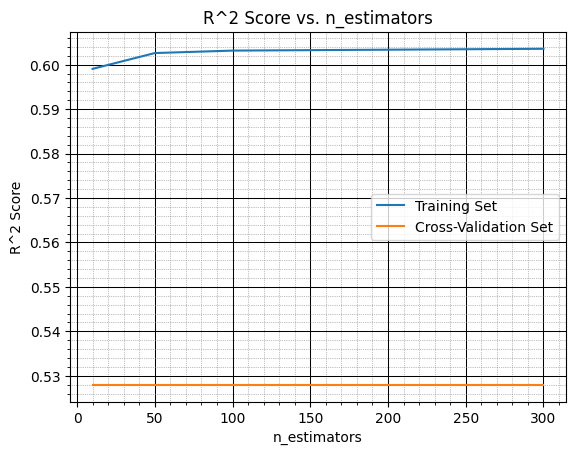

In [48]:
# Determine the number of estimators:
accuracy_list_train = []
accuracy_list_cv = []
for n_estimators in n_estimators_list:
    model_4 = RandomForestRegressor(n_estimators=n_estimators, random_state=RANDOM_STATE)
    model_4.fit(X_train, y_train_)
    y_pred_train = model_4.predict(X_train)
    y_pred_cv = model.predict(X_cv)
    accuracy_train = r2_score(y_train_, y_pred_train)
    accuracy_cv = r2_score(y_cv, y_pred_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

# Plot the accuracy vs. n_estimators
plt.plot(n_estimators_list, accuracy_list_train, label='Training Set')
plt.plot(n_estimators_list, accuracy_list_cv, label='Cross-Validation Set')
plt.xlabel('n_estimators')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. n_estimators')
plt.legend()
# Enable grid lines
# Enable major grid lines
plt.grid(True, which='major', linestyle='-', linewidth=0.75, color='black')
# Enable minor ticks and grid lines
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray')
plt.show()


In [49]:
# Train the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=50, max_depth=9, min_samples_split=90, random_state=RANDOM_STATE)
random_forest_model.fit(X_train, y_train_)

RandomForestRegressor(max_depth=9, min_samples_split=90, n_estimators=50,
                      random_state=42)

In [50]:
X_train.head()

,YearsCodePro,Brazil,Canada,France,Germany,India,Italy,Netherlands,Other,Spain,UK,USA,Ukraine,Less than a Bachelor’s degree,Master’s degree,Post grad
4129,6.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
13206,8.0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
27705,24.0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
30969,28.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
21426,10.0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [51]:
rand_pred = random_forest_model.predict(X_cv)
rand_pred = np.round(rand_pred, 2)
rand_pred_df = pd.DataFrame(rand_pred)
rand_pred_df.head()

,0
0,89424.78
1,107685.52
2,68026.92
3,120693.32
4,54705.74


In [52]:
# Merge the predictions with the actual salaries in the cross-validation data:
predicted_salaries_rf = pd.DataFrame({"Predicted Salary": rand_pred, "Actual Salary": y_cv})
predicted_salaries_rf.head()

,Predicted Salary,Actual Salary
15359,89424.78,129602
9542,107685.52,95000
12479,68026.92,64000
13357,120693.32,80000
34615,54705.74,103889


In [53]:
# Evaluate the model
mse_rf = np.sqrt(mean_squared_error(y_cv, rand_pred))
print(f'Mean Squared Error: {mse_rf:.2f}')

Mean Squared Error: 34553.72


In [54]:
# Mean Absolute Percentage Error:
MAPE_rf = mean_absolute_percentage_error(y_cv, rand_pred)
print(f'Mean Absolute Percentage Error: {MAPE_rf:.2f}%')

Mean Absolute Percentage Error: 45.36%


In [55]:
# Predict the salary for the test data
rand_pred_test = random_forest_model.predict(X_test)
rand_pred_test = np.round(rand_pred_test, 2)
rand_pred_test_df = pd.DataFrame(rand_pred_test)
rand_pred_test_df.head()

,0
0,42665.69
1,167122.94
2,134888.59
3,89702.38
4,160127.33


In [56]:
# Merge the predictions with the actual salaries in the test data:
predicted_salaries_rf_test = pd.DataFrame({"Predicted Salary": rand_pred_test, "Actual Salary": y_test})
predicted_salaries_rf_test.head()

,Predicted Salary,Actual Salary
2611,42665.69,29909
21238,167122.94,180000
28061,134888.59,175000
31471,89702.38,171850
19096,160127.33,145000


In [57]:
# Mean Absolute Percentage Error for the test data:
MAPE_rf_test = mean_absolute_percentage_error(y_test, rand_pred_test)
print(f'Mean Absolute Percentage Error for the test data: {MAPE_rf_test:.2f}%')

Mean Absolute Percentage Error for the test data: 43.77%


In [58]:
# Mean Squared Error for the test data:
mse_rf_test = np.sqrt(mean_squared_error(y_test, rand_pred_test))
print(f'Mean Squared Error for the test data: {mse_rf_test:.2f}')


Mean Squared Error for the test data: 34572.12


In [59]:
# Model Comparison:
print(f"KNN Model Mean Squared Error: {mse:.2f}")
print(f"Random Forest Model Mean Squared Error: {mse_rf:.2f}")
print(f"KNN Model Mean Absolute Percentage Error: {MAPE:.2f}%")
print(f"Random Forest Model Mean Absolute Percentage Error: {MAPE_rf:.2f}%")
print(f"KNN Model Mean Squared Error for the test data: {mse_test:.2f}")
print(f"Random Forest Model Mean Squared Error for the test data: {mse_rf_test:.2f}")
print(f"KNN Model Mean Absolute Percentage Error for the test data: {MAPE_test:.2f}%")
print(f"Random Forest Model Mean Absolute Percentage Error for the test data: {MAPE_rf_test:.2f}%")


KNN Model Mean Squared Error: 35568.67
Random Forest Model Mean Squared Error: 34553.72
KNN Model Mean Absolute Percentage Error: 46.98%
Random Forest Model Mean Absolute Percentage Error: 45.36%
KNN Model Mean Squared Error for the test data: 35888.38
Random Forest Model Mean Squared Error for the test data: 34572.12
KNN Model Mean Absolute Percentage Error for the test data: 45.80%
Random Forest Model Mean Absolute Percentage Error for the test data: 43.77%


In [60]:
# Create a Baseline Model:
from sklearn.dummy import DummyRegressor
dummy_model = DummyRegressor(strategy='mean')
dummy_model.fit(X_train, y_train_)
dummy_pred = dummy_model.predict(X_cv)
dummy_pred = np.round(dummy_pred, 2)
# Baseline Model Evaluation:
mse_dummy = np.sqrt(mean_squared_error(y_cv, dummy_pred))
print(f'Mean Squared Error for the Baseline Model: {mse_dummy:.2f}')
mape_dummy = mean_absolute_percentage_error(y_cv, dummy_pred)
print(f'Mean Absolute Percentage Error for the Baseline Model: {mape_dummy:.2f}%')

Mean Squared Error for the Baseline Model: 51771.97
Mean Absolute Percentage Error for the Baseline Model: 86.82%


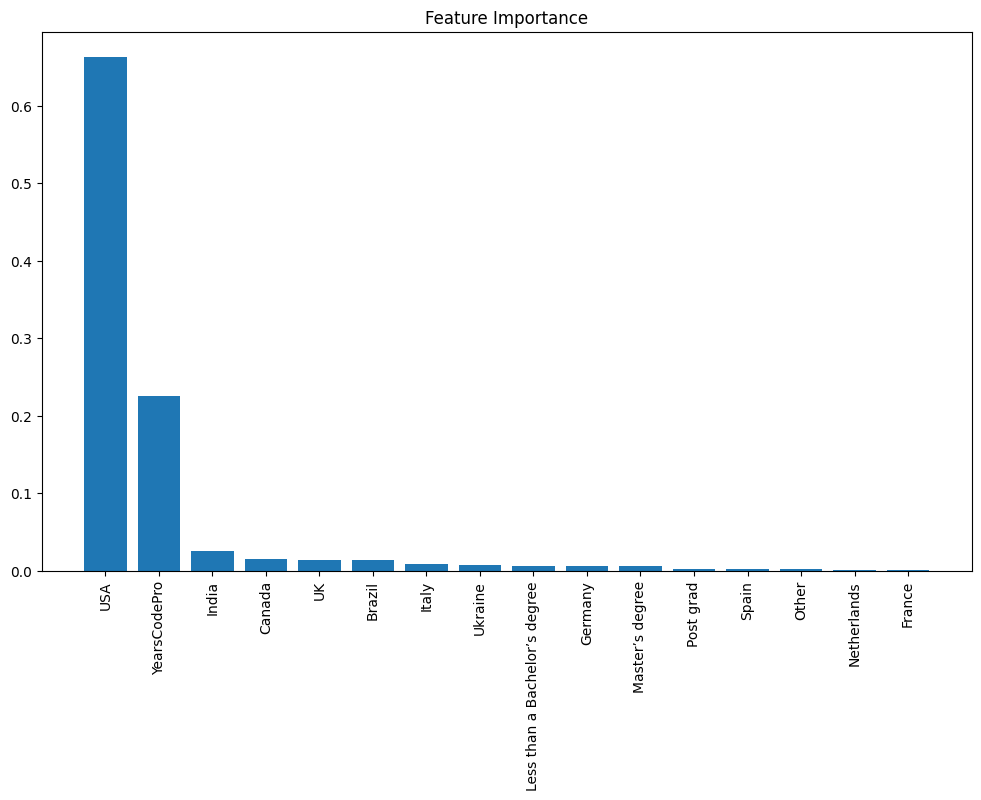

In [61]:
# Feature Importance:
importances = random_forest_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 7))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.title('Feature Importance')
plt.show()

In [62]:
# Find country_11:
print(f"Country_11: {country_map[11]}, EdLevel_1: {edlevel_map[1]}")


Country_11: USA, EdLevel_1: Less than a Bachelor’s degree


In [63]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
374,Other,Post grad,6.0,30074
379,Other,Master’s degree,6.0,91295
392,UK,Post grad,18.0,161044
395,UK,Master’s degree,25.0,121018
398,USA,Less than a Bachelor’s degree,30.0,195000


In [69]:
# Function to encode new data and predict salary with dummyy (One-hot encoding) and KNN model:
def predict_salary(new_data):
    # Create a DataFrame from the NumPy array
    s = pd.DataFrame([new_data], columns=["Country", "EdLevel", "YearsCodePro"])
    
    # Apply the cleaning functions
    s["YearsCodePro"] = s["YearsCodePro"].apply(clean_experience)
    s["EdLevel"] = s["EdLevel"].apply(clean_education)
    
    # Get dummies for the "Country" and "EdLevel" columns only
    s_encoded = pd.get_dummies(s[['Country', 'EdLevel']], drop_first=True, prefix='', prefix_sep='')
    
    # Concatenate the encoded DataFrame with the "YearsCodePro" column
    s_encoded = pd.concat([s_encoded, s[['YearsCodePro']]], axis=1)
    
    # Ensure the new data has the same columns as the training data
    s_encoded = s_encoded.reindex(columns=X_train.columns, fill_value=0)
    
    # Predict the salary for the new data
    return model.predict(s_encoded)[0]

# Example usage
trial = np.array(["UK", "Master’s degree", "25"])
predicted_salary = predict_salary(trial)
print(f"Predicted salary: ${predicted_salary:.2f}")

Predicted salary: $151820.42


In [65]:
# Function to encode new data and predict salary with dummy encoder(One-hot encoding) and Random Forest model:
def predict_salary(new_data):
    # Create a DataFrame from the NumPy array
    s = pd.DataFrame([new_data], columns=["Country", "EdLevel", "YearsCodePro"])
    
    # Apply the cleaning functions
    s["YearsCodePro"] = s["YearsCodePro"].apply(clean_experience)
    s["EdLevel"] = s["EdLevel"].apply(clean_education)
    
    # Get dummies for the "Country" and "EdLevel" columns only
    s_encoded = pd.get_dummies(s[['Country', 'EdLevel']], drop_first=True)
    
    # Concatenate the encoded DataFrame with the "YearsCodePro" column
    s_encoded = pd.concat([s_encoded, s[['YearsCodePro']]], axis=1)
    
    # Ensure the new data has the same columns as the training data
    s_encoded = s_encoded.reindex(columns=X_train.columns, fill_value=0)
    
    # Predict the salary for the new data
    return random_forest_model.predict(s_encoded)[0]



In [66]:
import pickle
# Save the random forest model to .pkl file:
with open("rf_model.pkl", "wb") as file:
    pickle.dump({
        'model': random_forest_model,
        'X_train.columns': X_train.columns
    }, file)

In [67]:
# save the KNN model to .pkl file:
with open("knn_model.pkl", "wb") as file:
    pickle.dump({
        'model': model,
        'knn_column': X_train.columns
    }, file)